### ADA-II – Spring 2022 Project: Time Series Analysis with ARIMA/SARIMA/VARMAX/HWES

Dataset: https://www.kaggle.com/gustavomodelli/forest-fires-in-brazil

#### Description of dataset: 
Description of forest fires dataset

In [106]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA



from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.holtwinters import ExponentialSmoothing

from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import statsmodels.api as sm


import warnings
warnings.filterwarnings('ignore')



In [ ]:
import os
os.getcwd()

In [1]:
!pip install opendatasets

     |████████████████████████████████| 58 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 5.9 MB/s eta 0:00:01
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73053 sha256=fa01f2e93e0ad647e58d51908bbc768fec4fac99d272f8a0376b332f93c836a4
  Stored in directory: /Users/jenarriaza/Library/Caches/pip/wheels/29/da/11/144cc25aebdaeb4931b231e25fd34b394e6a5725cbb2f50106
Successfully built kaggle


In [3]:
import opendatasets as od

In [4]:
od.download("https://www.kaggle.com/gustavomodelli/forest-fires-in-brazil")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: 

 jenarriaz


Your Kaggle Key: 

 ································


100%|██████████| 31.1k/31.1k [00:00<00:00, 321kB/s]

In [2]:
df = pd.read_csv('forest-fires-in-brazil/amazon.csv', engine='python', encoding='latin1')

In [3]:
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [5]:
df.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [3]:
import plotly.io as pio
pio.renderers.default = "iframe"

In [4]:
data = df
# Cleaning up data to correct language, rename key variables, etc.

data['month'].replace(to_replace = 'Janeiro', value = 'Jan', inplace = True)
data['month'].replace(to_replace = 'Fevereiro', value = 'Feb', inplace = True)
data['month'].replace(to_replace = 'Março', value = 'Mar', inplace = True)
data['month'].replace(to_replace = 'Abril', value = 'Apr', inplace = True)
data['month'].replace(to_replace = 'Maio', value = 'May', inplace = True)
data['month'].replace(to_replace = 'Junho', value = 'Jun', inplace = True)
data['month'].replace(to_replace = 'Julho', value = 'Jul', inplace = True)
data['month'].replace(to_replace = 'Agosto', value = 'Aug', inplace = True)
data['month'].replace(to_replace = 'Setembro', value = 'Sep', inplace = True)
data['month'].replace(to_replace = 'Outubro', value = 'Oct', inplace = True)
data['month'].replace(to_replace = 'Novembro', value = 'Nov', inplace = True)
data['month'].replace(to_replace = 'Dezembro', value = 'Dec', inplace = True)


data = data.rename(columns={'number': 'Total_Fires'})

In [5]:
# Group data by year/month/state
year_mo_state = data.groupby(by = ['year','state', 'month']).sum().reset_index()

year_mo_state.head()

,year,state,month,Total_Fires
0,1998,Acre,Apr,0.0
1,1998,Acre,Aug,130.0
2,1998,Acre,Dec,7.0
3,1998,Acre,Feb,0.0
4,1998,Acre,Jan,0.0


### Visualizing data over time

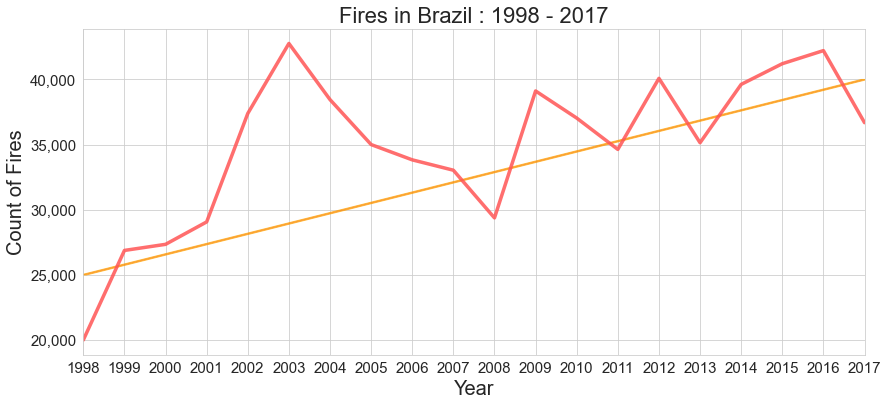

In [10]:
# Set up the defaults
sns.set_style('whitegrid')
from matplotlib.pyplot import MaxNLocator, FuncFormatter

plt.figure(figsize=(14,6))

# Make the plot
ax = sns.lineplot(x = 'year', y = 'Total_Fires', data = year_mo_state, estimator = 'sum', color = '#FF5555', 
                  lw = 3.5, err_style = None , alpha = 0.85)
# Create a line
import pylab as p
p.arrow( 1998, 25000, 19, 15000, facecolor="#F97306", edgecolor="#FFA500", head_width=0, head_length=0, length_includes_head = False,
       width = 0.15, alpha = 0.7, shape = "full")

# Make pretty
plt.title('Fires in Brazil : 1998 - 2017', fontsize = 22)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Count of Fires', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

ax.xaxis.set_major_locator(plt.MaxNLocator(19))
ax.set_xlim(1998, 2017)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.,
        1600.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

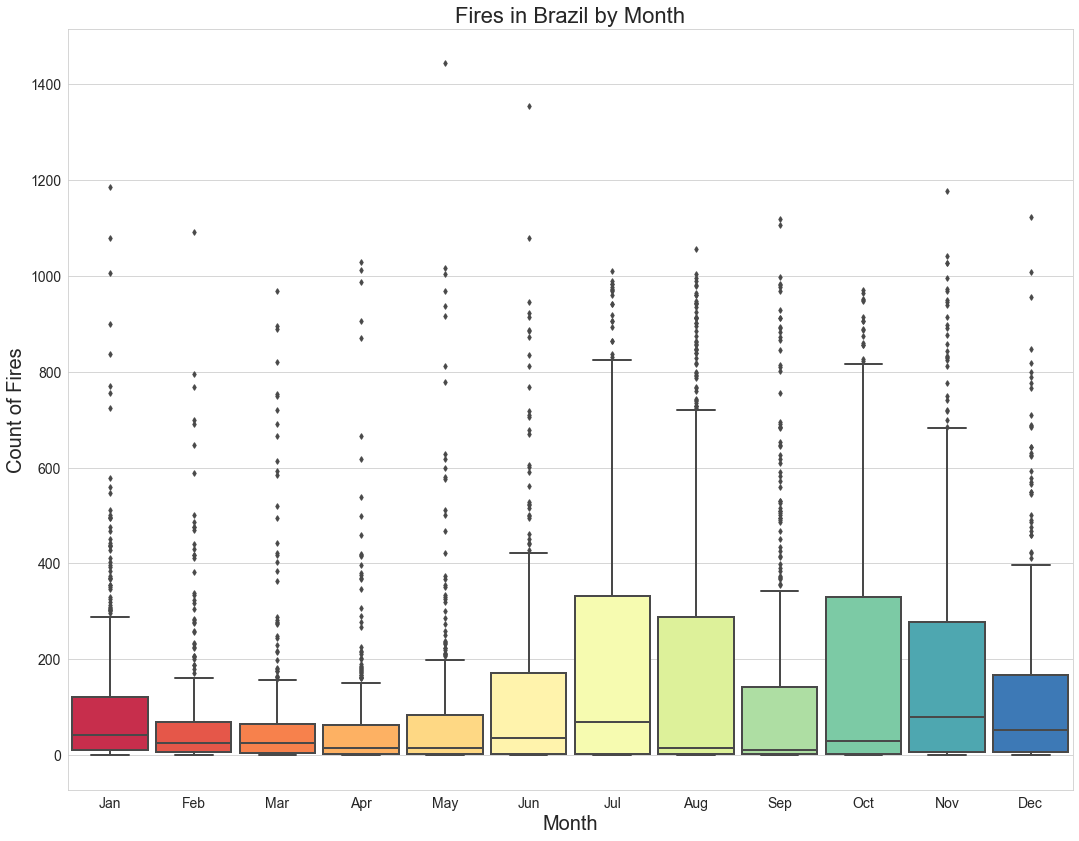

In [12]:
# Figure size
plt.figure(figsize=(18,14))

# The plot
sns.boxplot(x = 'month', order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec'], 
            y = 'Total_Fires', data = year_mo_state, palette = "Spectral", saturation = 1, width = 0.9, fliersize=4, linewidth=2)

# Format plot
plt.title('Fires in Brazil by Month', fontsize = 22)
plt.xlabel('Month', fontsize = 20)
plt.ylabel('Count of Fires', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

In [13]:
# Analyze top states affected by fires
states_fires = data.groupby(by = 'state')['Total_Fires'].sum().sort_values(ascending = False).head(10).reset_index()
states_fires = states_fires.sort_values(by = 'Total_Fires', ascending = True)

states_fires

,state,Total_Fires
9,Amazonas,30650.129
8,Tocantins,33707.885
7,Minas Gerais,37475.258
6,Goias,37695.520
5,Piau,37803.747
4,Bahia,44746.226
3,Rio,45160.865
2,Sao Paulo,51121.198
1,Paraiba,52435.918
0,Mato Grosso,96246.028


No handles with labels found to put in legend.


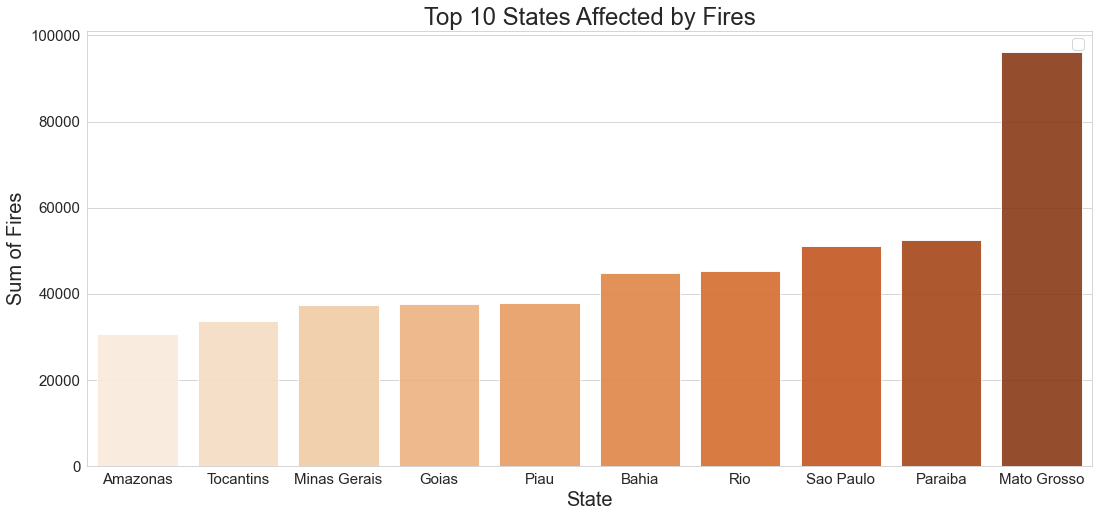

In [15]:
# Set figure size
plt.figure(figsize = (18, 8))

# plot
ax = sns.barplot(x = states_fires['state'], y = states_fires['Total_Fires'], palette = "Oranges", alpha = 0.90)

# Format graph
plt.title("Top 10 States Affected by Fires", fontsize = 24)
plt.xlabel("State", fontsize = 20)
plt.ylabel("Sum of Fires", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)


#### To better deal with our data, we will analyze the time periods by quarter

In [15]:
list_ = range(1, 13)
m = dict(zip(data['month'].unique(), list_))
data['month'] = data['month'].map(m)

In [16]:
# Defining a function for each quarter by month

def quarter(month):
    if month == 1 or month == 2 or month == 3:
        return '1_Quarter'
    elif month == 4 or month == 5 or month == 6:
        return '2_Quarter'
    elif month == 7 or month == 8 or month == 9:
        return '3_Quarter'
    elif month == 10 or month == 11 or month == 12:
        return '4_Quarter'
    
    
data['quarter'] = data['month'].apply(lambda x : quarter(x))

In [17]:
# Creating a list and index for time periods

aux = data.groupby(['year', 'quarter'])['Total_Fires'].agg('sum')
indexs = []
for year,quarter in list(aux.index):
    indexs.append(str(year)+'_'+str(quarter))

In [18]:
aux

year  quarter  
1998  1_Quarter        0.000
      2_Quarter     1352.201
      3_Quarter    11335.322
      4_Quarter     7326.448
1999  1_Quarter     3032.000
                     ...    
2016  4_Quarter    12784.238
2017  1_Quarter     5825.000
      2_Quarter     8213.361
      3_Quarter    12829.725
      4_Quarter     9817.538
Name: Total_Fires, Length: 80, dtype: float64

In [20]:
# Pot the observed quarter trends

import plotly.express as px
import plotly.graph_objects as go
fig = px.line(x=indexs, y=list(aux[:]), title='Observed')
fig.show()

In [22]:
# Parsing dates:

data['date'] = pd.to_datetime(data['date'])

In [32]:
import statsmodels.api as sm
import plotly.graph_objects as go

res = sm.tsa.seasonal_decompose(list(aux[:]), period=3, model="additive")
fig = go.Figure()

fig.add_trace(go.Scatter(x=indexs, y=res.observed, mode='lines',name='Observed'))
fig.add_trace(go.Scatter(x=indexs, y=res.trend, mode='lines',name='Rolling Trend'))
fig.show()

In [42]:
# Parsing dates:

df['date'] = pd.to_datetime(df['date'])

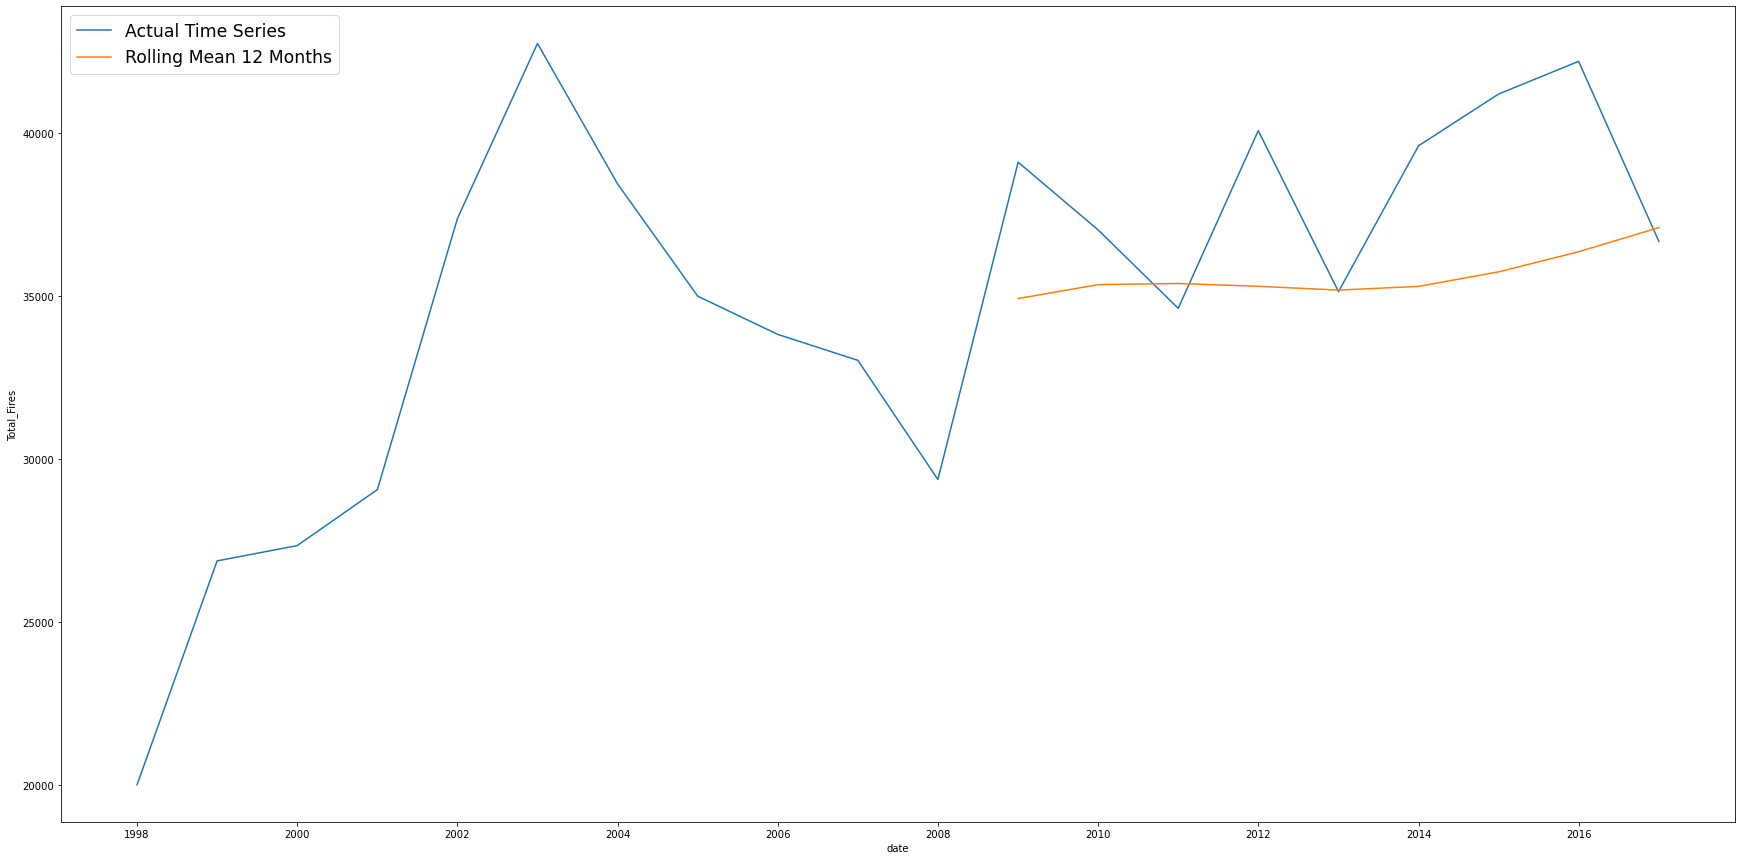

In [46]:
# Inspecting time series and rolling mean:

fire = df[['date', 'number']].groupby('date').sum()
tseries = df.groupby(['date'])['number'].agg(
    ['sum']).reset_index().rename(columns={'sum': 'Total_Fires'})

tseries = tseries.set_index('date')

fig = plt.subplots(figsize=(30, 15))

g = sns.lineplot(x=tseries.index, y='Total_Fires',
                 data=tseries, label="Actual Time Series")

rmean = fire.rolling(12, win_type='triang').mean()

g = sns.lineplot(x=rmean.index, y='number',
                 data=rmean, label="Rolling Mean 12 Months")

plt.legend(fontsize='xx-large')
plt.show()

In [47]:
# Choosing train data:

train = tseries.loc['2010':'2017']

In [52]:
train.shape

(8, 1)

In [53]:
tseries.shape

(20, 1)

In [56]:
aux

year  quarter  
1998  1_Quarter        0.000
      2_Quarter     1352.201
      3_Quarter    11335.322
      4_Quarter     7326.448
1999  1_Quarter     3032.000
                     ...    
2016  4_Quarter    12784.238
2017  1_Quarter     5825.000
      2_Quarter     8213.361
      3_Quarter    12829.725
      4_Quarter     9817.538
Name: Total_Fires, Length: 80, dtype: float64

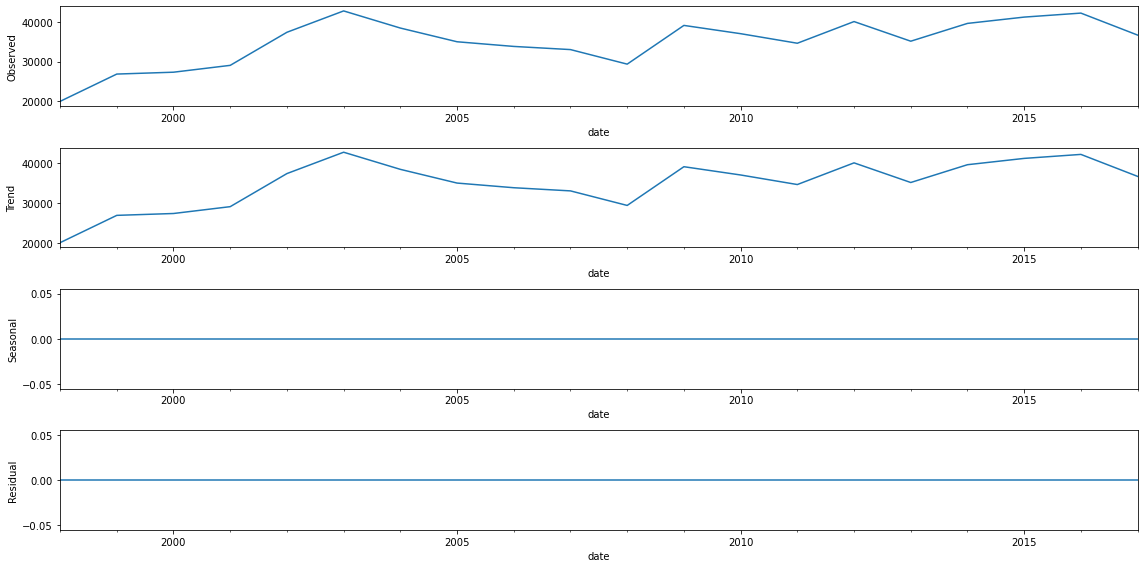

In [57]:
# Decomposing the data:

decompose = sm.tsa.seasonal_decompose(
    tseries, model='additive', extrapolate_trend='freq')

# Plot.
fig, axes = plt.subplots(nrows=4, figsize=(16, 8))

decompose.observed.plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Observed')

decompose.trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel('Trend')

decompose.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Seasonal')

decompose.resid.plot(ax=axes[3], legend=False)
axes[3].set_ylabel('Residual')


plt.tight_layout()
plt.show()

In [ ]:
df.isna().values.sum() (to count NaNs across the entire DataFrame), or len(df) - df['column'].count()

### Running SARIMAX model to include seasonal effects

In [58]:
# Fitting the model.

mod = sm.tsa.statespace.SARIMAX(aux,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

/Users/jenarriaza/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/jenarriaza/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4491      0.180     -2.501      0.012      -0.801      -0.097
ma.L1         -0.5006      0.132     -3.779      0.000      -0.760      -0.241
ar.S.L12       0.0618      0.171      0.362      0.717      -0.273       0.397
ma.S.L12      -0.8210      0.135     -6.062      0.000      -1.086      -0.556
sigma2      3.531e+06   9.24e+05      3.821      0.000    1.72e+06    5.34e+06


### Validating the model

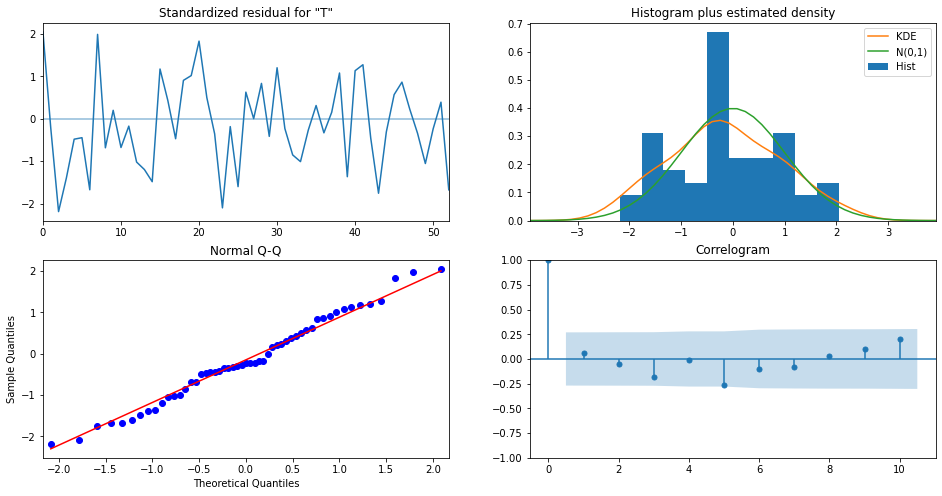

In [59]:
# Investigating the results:

results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [64]:
aux

year  quarter  
1998  1_Quarter        0.000
      2_Quarter     1352.201
      3_Quarter    11335.322
      4_Quarter     7326.448
1999  1_Quarter     3032.000
                     ...    
2016  4_Quarter    12784.238
2017  1_Quarter     5825.000
      2_Quarter     8213.361
      3_Quarter    12829.725
      4_Quarter     9817.538
Name: Total_Fires, Length: 80, dtype: float64

In [84]:
# Validating forecasts:

pred = results.get_prediction(
    start=pd.to_datetime('2007-01-01'), dynamic=False)

pred_ci = pred.conf_int()

ax = aux['2001':].plot(label='observed')

pred.predicted_mean.plot(
    ax=ax, label='One-step ahead Forecast', alpha=.8, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.1)

ax.set_xlabel('Period')
ax.set_ylabel('Total Fires')

plt.legend()
plt.show()

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

### SARIMAX Results

/Users/jenarriaza/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



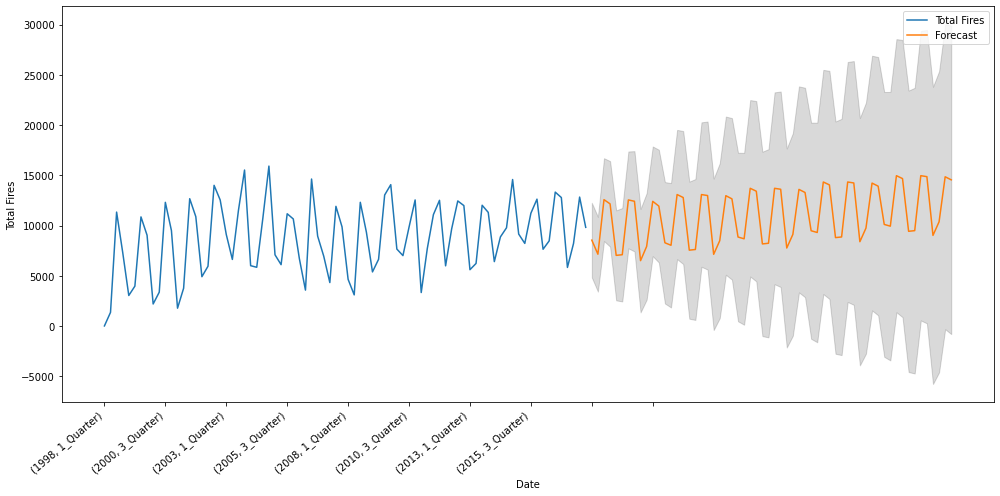

In [72]:
# Forecasting.

pred_uc = results.get_forecast(steps=60)
pred_ci = pred_uc.conf_int()

ax = aux.plot(label='Total Fires', figsize=(14, 7))

pred_uc.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.15)

ax.set_xlabel('Date')
ax.set_ylabel('Total Fires')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

### Analying fires with VARMAX

In [97]:
filepath = 'forest-fires-in-brazil/amazon.csv'
macro_data = pd.read_csv(filepath, parse_dates=['date'], index_col='date', engine='python', encoding='latin1')
print(macro_data.shape)
macro_data.head()

(6454, 4)


,year,state,month,number
date,,,,
1998-01-01,1998,Acre,Janeiro,0.0
1999-01-01,1999,Acre,Janeiro,0.0
2000-01-01,2000,Acre,Janeiro,0.0
2001-01-01,2001,Acre,Janeiro,0.0
2002-01-01,2002,Acre,Janeiro,0.0


In [102]:
macro_data = macro_data[['number']]
print(macro_data.shape)

(6454, 1)


In [103]:
train_df=macro_data[:-12]
test_df=macro_data[-12:]

In [104]:
print(test_df.shape)

(12, 1)


In [105]:
model = VAR(train_df.diff()[1:])

ValueError: Only gave one variable to VAR

#### Assessing model performance

In [92]:
sorted_order=model.select_order(maxlags=20)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        13.44       13.44   6.872e+05       13.44
1        13.22       13.23   5.518e+05       13.22
2        13.15       13.16   5.117e+05       13.15
3        13.11       13.13   4.953e+05       13.12
4        13.09       13.10   4.817e+05       13.09
5        13.05       13.08   4.666e+05       13.06
6        13.03       13.06   4.567e+05       13.04
7        13.02       13.05   4.499e+05       13.03
8        13.00       13.04   4.440e+05       13.02
9        12.99       13.03   4.387e+05       13.01
10       12.98       13.02   4.333e+05       12.99
11       12.97       13.01   4.275e+05       12.98
12       12.95       13.00   4.204e+05       12.97
13       12.93       12.98   4.113e+05       12.95
14       12.90       12.96   3.986e+05       12.92
15       12.85       12.92   3.824e+05       12.88
16       12.79       12.86   3.

In [93]:
var_model = VARMAX(train_df, order=(4,0),enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

                           Statespace Model Results                           
Dep. Variable:     ['number', 'year']   No. Observations:                 6442
Model:                         VAR(4)   Log Likelihood              -59685.022
                          + intercept   AIC                         119412.044
Date:                Wed, 09 Mar 2022   BIC                         119554.227
Time:                        22:30:54   HQIC                        119461.243
Sample:                             0                                         
                               - 6442                                         
Covariance Type:                  opg                                         
Ljung-Box (L1) (Q):             0.49, 1.39   Jarque-Bera (JB):   22812.18, 32231.94
Prob(Q):                        0.49, 0.24   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         0.83, 1.00   Skew:                      1.98, -2.93
Prob(H) (two-sided):            0.00,

In [94]:
n_forecast = 12
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)#start="1989-07-01",end='1999-01-01')

predictions=predict.predicted_mean

In [96]:
predictions.columns=['number_fires_predicted','year_predicted']
predictions

,number_fires_predicted,year_predicted
6442,96.466170,2005.766138
6443,103.641396,2006.958748
6444,109.380823,2007.706608
6445,109.244621,2008.099347
6446,108.852660,2008.150925
6447,108.556115,2008.027442
6448,108.013804,2007.836618
6449,107.350281,2007.645789
6450,107.004455,2007.500048
6451,106.916364,2007.410858


### Holt-Winter's Exponential Smoothing

In [121]:
filepath = 'forest-fires-in-brazil/amazon.csv'
df_holt = pd.read_csv(filepath, parse_dates=['month'], index_col='month', engine='python', encoding='latin1')

In [124]:
df_holt

,year,state,number,date
month,,,,
Janeiro,1998,Acre,0.0,1998-01-01
Janeiro,1999,Acre,0.0,1999-01-01
Janeiro,2000,Acre,0.0,2000-01-01
Janeiro,2001,Acre,0.0,2001-01-01
Janeiro,2002,Acre,0.0,2002-01-01
...,...,...,...,...
Dezembro,2012,Tocantins,128.0,2012-01-01
Dezembro,2013,Tocantins,85.0,2013-01-01
Dezembro,2014,Tocantins,223.0,2014-01-01


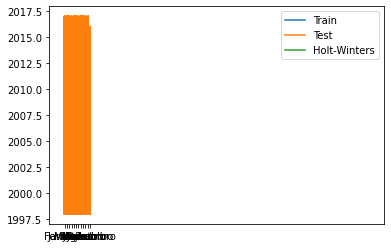

In [123]:
# HWES Holt Winter's exponential smoothing

df_holt.index.freq = 'MS'
train, test = df_holt.iloc[:130, 0], df_holt.iloc[130:, 0]
model = ExponentialSmoothing(train, seasonal='mul', seasonal_periods=12).fit()
pred = model.predict()

plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.legend(loc='best')